# **Manually / EnjoySport Dataset for S Algorithm**

In [ ]:
import pandas as pd
from pandas import DataFrame

# Uncomment the following line to load the dataset from an external CSV file
# data = pd.read_csv('ENJOYSPORT.csv')

 # Sample dataset defined within the code
data = pd.DataFrame({
    'Sky': ['Sunny', 'Sunny', 'Rainy', 'Sunny', 'Rainy', 'Rainy', 'Sunny'],
    'AirTemp': ['Warm', 'Warm', 'Cold', 'Warm', 'Cold', 'Cold', 'Warm'],
    'Humidity': ['Normal', 'High', 'High', 'High', 'Normal', 'Normal', 'High'],
    'Wind': ['Strong', 'Strong', 'Strong', 'Strong', 'Weak', 'Weak', 'Strong'],
    'Water': ['Warm', 'Warm', 'Cold', 'Warm', 'Warm', 'Cold', 'Warm'],
    'Forecast': ['Same', 'Same', 'Change', 'Same', 'Same', 'Change', 'Same'],
    'EnjoySport': ['Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes']  # Target column
})

# Check dataset details
columnLength = data.shape[1]
rowlen = data.shape[0]
print(columnLength)
print(rowlen)
print(data.values)
data.head()

hp = []
hn = []
h = ['0'] * (columnLength - 1)

# Split data into positive and negative examples based on target column 'EnjoySport'
for trainingExample in data.values:
    if trainingExample[-1] != 0:
        hp.append(list(trainingExample))
    else:
        hn.append(list(trainingExample))

# # Generate the Maximally Specific Hypothesis (h)
# for i in range(len(hp)):
#     for j in range(columnLength - 1):
#         if h[j] == '0':
#             h[j] = hp[i][j]
#         elif h[j] != hp[i][j]:
#             h[j] = '?'
#         else:
#             h[j] = hp[i][j]

# # Output the results
# print('\nThe positive Hypotheses are:', hp)
# print('\nThe negative Hypotheses are:', hn)
# print('\nThe Maximally Specific Hypothesis h is:', h)



#for sample dataset
colLen = data.shape[1] - 1
for training in data.values:
    if training[-1] == 'Yes':
        hp.append(list(training))
        for i in range(colLen):
            if h[i] == '0':
                h[i] = training[i]
            elif h[i] != training[i]:
                h[i] = '?'
    else:
        hn.append(list(training))
print("\nPositive Hypotheses (Positive Training Examples):")
print(pd.DataFrame(hp, columns=list(data.columns)))

print("\nNegative Hypotheses (Negative Training Examples):")
print(pd.DataFrame(hn, columns=list(data.columns)))

print("\nMaximally Specific Hypothesis:")
print(h)


7
7
[['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same' 'Yes']
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same' 'Yes']
 ['Rainy' 'Cold' 'High' 'Strong' 'Cold' 'Change' 'No']
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same' 'Yes']
 ['Rainy' 'Cold' 'Normal' 'Weak' 'Warm' 'Same' 'No']
 ['Rainy' 'Cold' 'Normal' 'Weak' 'Cold' 'Change' 'No']
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same' 'Yes']]

Positive Hypotheses (Positive Training Examples):
      Sky AirTemp Humidity    Wind Water Forecast EnjoySport
0   Sunny    Warm   Normal  Strong  Warm     Same        Yes
1   Sunny    Warm     High  Strong  Warm     Same        Yes
2   Rainy    Cold     High  Strong  Cold   Change         No
3   Sunny    Warm     High  Strong  Warm     Same        Yes
4   Rainy    Cold   Normal    Weak  Warm     Same         No
5   Rainy    Cold   Normal    Weak  Cold   Change         No
6   Sunny    Warm     High  Strong  Warm     Same        Yes
7   Sunny    Warm   Normal  Strong  Warm     Same        Yes
8   Sunny    W

# **S Algorithm - 3 datasets**

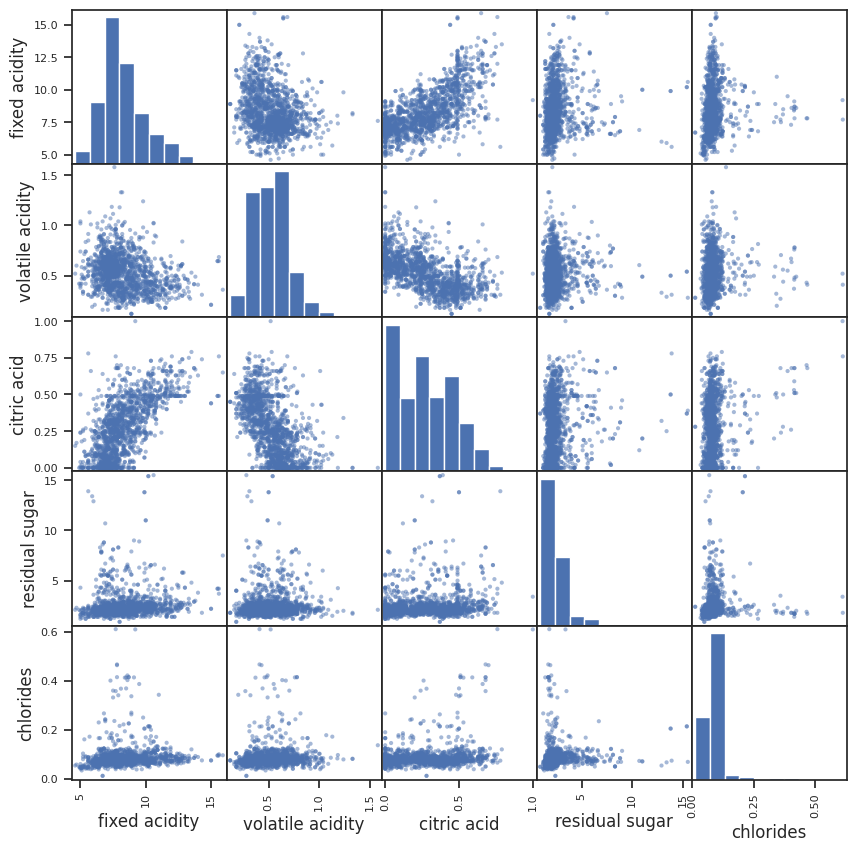

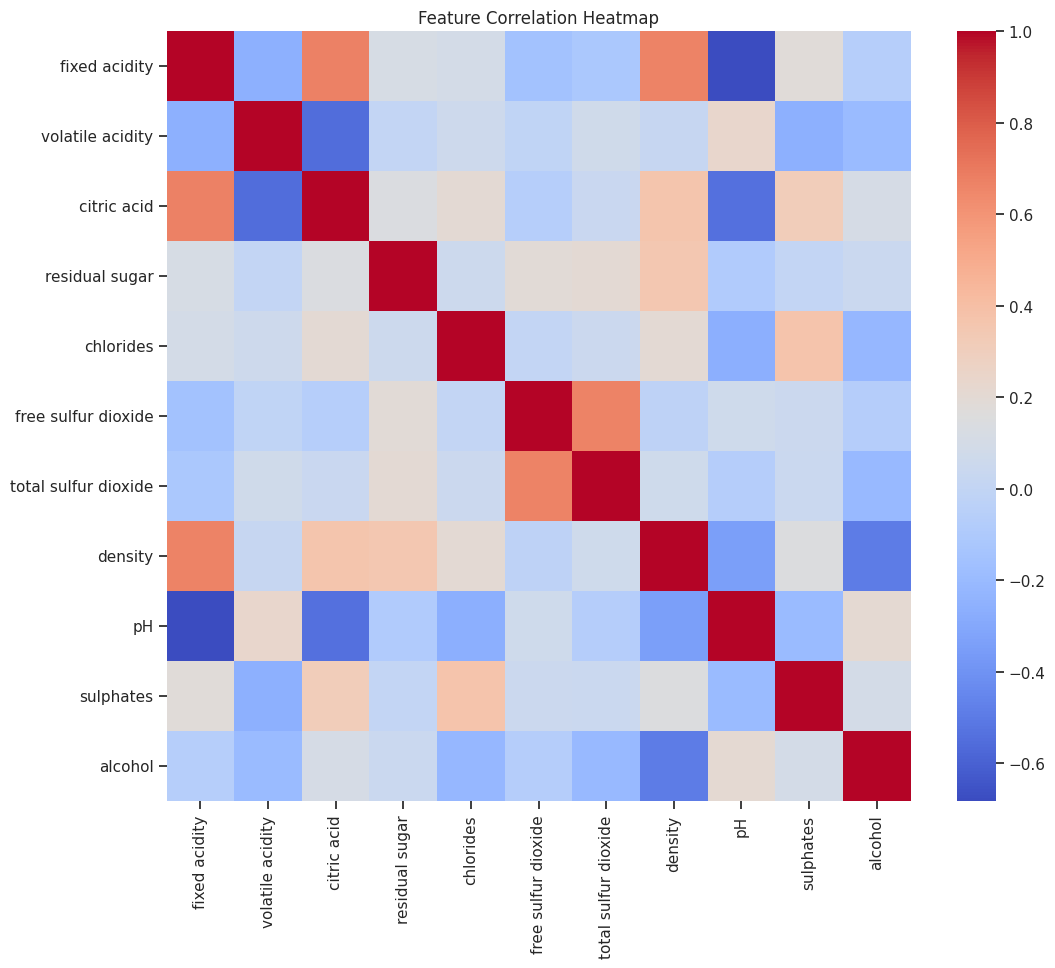

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error ,r2_score , mean_absolute_error
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# ==============================
# Dataset Selection (Uncomment the desired dataset)
# ==============================

# 1. Breast Cancer Dataset (sklearn default):
breast_cancer = load_breast_cancer()
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
labels = breast_cancer.target

# # 2. External Breast Cancer Dataset (CSV):
# df = pd.read_csv("breast-cancer.csv")
# labels = df['diagnosis']  # Assuming 'diagnosis' is the correct column name
# df = df.drop(['diagnosis'], axis=1)

# 3. Red Wine Quality Dataset:
df = pd.read_csv("winequality-red.csv", delimiter=",")
labels = df['quality']
df = df.drop(['quality'], axis=1)

# # 4. Housing Loan Approval Dataset:
# df = pd.read_csv("loan_sanction_train.csv")
# labels = df['Loan_Status']  # Assuming 'Loan_Status' is the target column
# labels = LabelEncoder().fit_transform(labels)  # Encode categorical target
# # Drop target column and preprocess categorical features
# df = df.drop(['Loan_Status'], axis=1)
# df = pd.get_dummies(df, drop_first=True)

# Exploratory Data Analysis for all 3
scatter_matrix(df.iloc[:, :5], figsize=(10, 10))  # Using first 5 features for visualization
plt.show()

sns.set(style="ticks", color_codes=True)
if 'species' in df.columns:
    sns.pairplot(df, hue='species')

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# ==============================
# Preprocessing (Applies to all datasets , Except Bahar wala Breast cancer)
# ==============================

# Impute missing values and scale features
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed) # then phir train wala

# # ==============================
# # Preprocessing (Applies  Bahar wala Breast cancer)
# # ==============================

# # Encode categorical labels to numeric
# label_encoder = LabelEncoder()
# labels_encoded = label_encoder.fit_transform(labels)

# # Impute missing values
# imputer = SimpleImputer(strategy='mean')
# df_imputed = imputer.fit_transform(df)

# # Scale the imputed dataset
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df_imputed)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df_scaled, labels, test_size=0.2, random_state=42) # rest sabke liya
# X_train, X_test, y_train, y_test = train_test_split(df_scaled, labels_encoded, test_size=0.2, random_state=42) # for bahar wala breast cancer

In [ ]:
def find_s_algorithm(data, target):
    # Ensure data is a NumPy array
    if isinstance(data, pd.DataFrame):
        data = data.to_numpy()
    if isinstance(target, pd.Series):
        target = target.to_numpy()

    columnLength = data.shape[1]
    h = ['0'] * columnLength  # Maximally Specific Hypothesis

    for i in range(len(data)):  # Iterate over all examples
        if target[i] == 1:  # Positive example (ensure labels are numerical)
            for j in range(columnLength):
                if h[j] == '0':
                    h[j] = data[i][j]
                elif h[j] != data[i][j]:
                    h[j] = '?'
    return h
# Preprocess labels for consistency
if labels.dtype == 'object' or isinstance(labels[0], str):  # Check if labels are categorical
    labels = LabelEncoder().fit_transform(labels)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, labels, test_size=0.2, random_state=42)

# Apply the S algorithm
hypothesis = find_s_algorithm(X_train, y_train)
print("Maximally Specific Hypothesis (h):", hypothesis)

# Train and evaluate an SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy score
print("Accuracy of SVM Model:", accuracy_score(y_test, y_pred))


Maximally Specific Hypothesis (h): ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
Accuracy of SVM Model: 0.559375
